In [29]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
from shapely.geometry import LineString, Point, Polygon
import math
import matplotlib

from mapclassify import Quantiles, UserDefined

In [203]:
MQ_CARREAU_200_2017 = 'data/Filosofi2017_carreaux_200m_mart.csv'
df = pd.read_csv(MQ_CARREAU_200_2017)
df['n'] = df['Idcar_200m'].str[15:22].astype(int)
df['e'] = df['Idcar_200m'].str[23:].astype(int)
#df['geometry'] = df[['n', 'e']].apply(lambda x: Point(x[1], x[0]), axis=1)
df['geometry'] = df[['n', 'e']].apply(lambda x: Polygon([[x[1] + dy, x[0] + dx] for dx in [0,199] for dy in [199, 0]]), axis=1)
df['rev'] = df['Ind_snv'] / df['Ind']

In [88]:
import pyproj
crs_5490 = pyproj.crs.CRS.from_user_input("""
PROJCRS["RGAF09 / UTM zone 20N",
    BASEGEOGCRS["RGAF09",
        DATUM["Reseau Geodesique des Antilles Francaises 2009",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",5489]],
    CONVERSION["UTM zone 20N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-63,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8807]]],
    CS[Cartesian,2],
        AXIS["(E)",east,
            ORDER[1],
            LENGTHUNIT["metre",1]],
        AXIS["(N)",north,
            ORDER[2],
            LENGTHUNIT["metre",1]],
    USAGE[
        SCOPE["Engineering survey, topographic mapping."],
        AREA["French Antilles onshore and offshore west of 60°W - Guadeloupe (including Grande Terre, Basse Terre, Marie Galante, Les Saintes, Iles de la Petite Terre, La Desirade); Martinique; St Barthélemy; northern St Martin."],
        BBOX[14.08,-63.66,18.31,-60]],
    ID["EPSG",5490]]
""")

In [ ]:
gdf = gpd.GeoDataFrame(df)
gdf = gdf.set_crs(crs_5490, allow_override=True)
#, crs=crs_5490)#'espg:5490')
#print(gdf.crs, gdf['geometry'].crs)
gdf = gdf.to_crs(epsg=4326)
#print(gdf.crs, gdf['geometry'].crs)

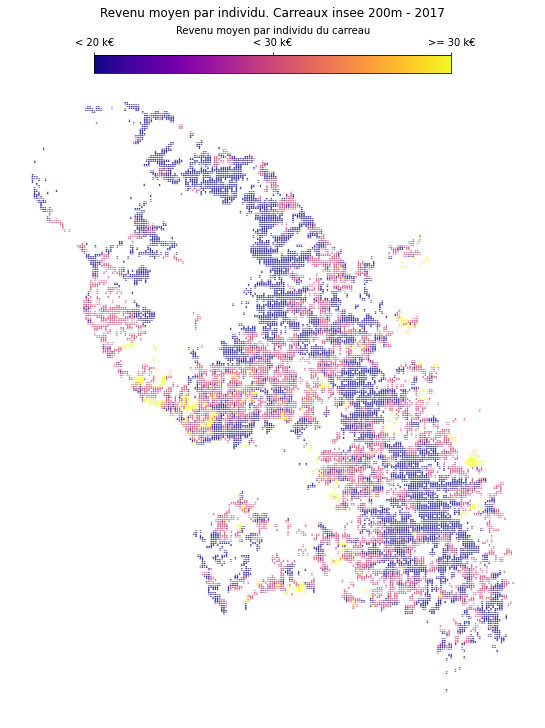

In [215]:
cmap = matplotlib.cm.plasma

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 10))
fig.suptitle("Revenu moyen par individu. Carreaux insee 200m - 2017")

gdf = gdf.assign(cl=UserDefined(df['rev'].dropna(), [20000, 30000]).yb)

title_rev = ['< 20 k€', '< 30 k€', '>= 30 k€']
kfmt = lambda x, pos: title_rev[int(x)]

gdf.plot(ax=ax, column='cl',  k=2, legend=True, cmap=cmap, #scheme='NaturalBreaks',)
 legend_kwds={"pad": 0, "location":"top", "orientation":"horizontal", "ticks":[0, 1, 2],
              "label": "Revenu moyen par individu du carreau", "shrink":0.5, "format": kfmt})
_ = ax.axis("off")

fig.savefig('output/2022-11-07.png', facecolor='white')

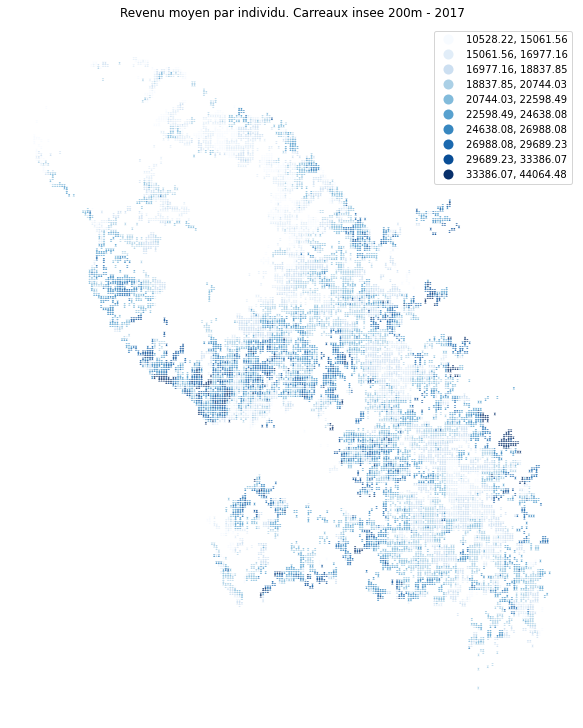

In [216]:
cmap = matplotlib.cm.Blues

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 10))
fig.suptitle("Revenu moyen par individu. Carreaux insee 200m - 2017")

gdf.plot(ax=ax, column='rev', #column='cl',  
         k=10, legend=True, cmap=cmap, scheme='NaturalBreaks',
)
_ = ax.axis("off")
fig.savefig('output-tmp/2022-11-07b.png', facecolor='white')